**Destek Vektör Makineleri (SVM)**

Veriyi birbirinden ayırmak için en uygun fonksiyonun tahmin edilmesine dayanır.
Hem sınıflandırma hem de kümeleme uygulamalarında kullanılabilir.

SVM'in kullandığı metot basitçe, **Böl, Parçala, Yönet**

Her bir problemi önce binary (1,0) şekle dönüştürür, 
Bir problemi iki sınıfa ayırır, böldüğü problemde karar değişkeni evet ise o karayı ver, hayır olanı tekrar ikiye böl ve bu şekilde devam et

**Scikit-learn**
https://scikit-learn.org sitesinde dataset diye aratarak data setleri listelenir


In [1]:
# Modül ekleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import svm, datasets
from sklearn import svm    # destek vektör makinaları
from sklearn.model_selection import train_test_split  # veri setini eğitim ve test olarak ayırmak için
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)

In [2]:
# Veri seti yükleme
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris_x, iris_y =  datasets.load_iris(return_X_y=True)   # öznitelik (x) dizi olarak almak, y hedef(çıktı)

In [4]:
# sklearn ile dosya yüklenirse, data frame dönüştürmek için aşağıdaki işlem yapılmalı
df=pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


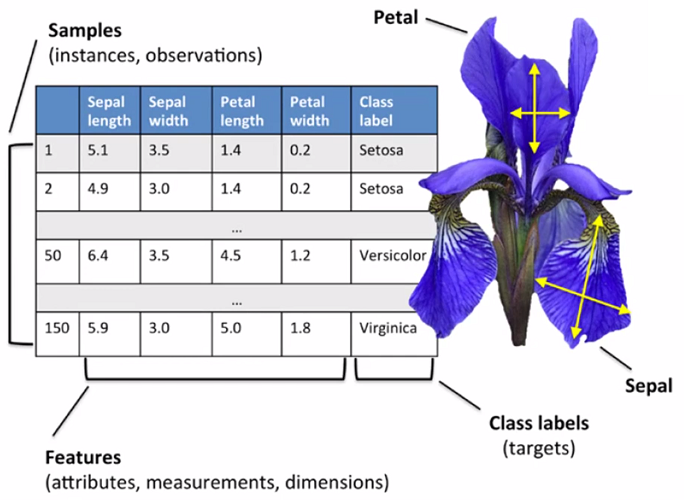

In [5]:
iris_y   # çıktı / hedef  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# SVM modeli çağır
iris_model = svm.SVC()

In [8]:
iris_model.fit(iris_x, iris_y)  # iris model eğitiliyor

SVC()

In [9]:
iris_x[3]

array([4.6, 3.1, 1.5, 0.2])

In [10]:
iris_y[3]

0

In [11]:
iris.target_names[iris_y[3]]    # 3. gözlemin (örneğin) sınıf ismi  

'setosa'

In [12]:
y_tahmin= iris_model.predict(iris_x[3].reshape(1,-1))  #modelin tahmini
y_tahmin

array([0])

In [ ]:
iris.target_names[y_tahmin] 

array(['setosa'], dtype='<U10')

Veri Seti, % 80 Eğitim ve % 20 Test Olarak Bölünme İşlemi

In [ ]:
# Veri setinin % 80 eğitim, % 20 test olarak bölünmesi
iris_x_egitim, iris_x_test, iris_y_egitim, iris_y_test = train_test_split (iris_x,iris_y,test_size=0.2,random_state=42 )

In [ ]:
iris_y_predicted=iris_model.predict(iris_x_test)

In [ ]:
# % 100 doğruluk
accuracy_score(iris_y_test, iris_y_predicted)

1.0

In [ ]:
confusion_matrix(iris_y_test,iris_y_predicted)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
classification_report (iris_y_test,iris_y_predicted)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

Veri Seti Eğitim ve Test Olarak Bölünmeden Tahmin Performansı

In [ ]:
iris_y_predicted_=iris_model.predict(iris_x)

In [ ]:
confusion_matrix(iris_y,iris_y_predicted_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]])

**DataFrame olarak İşlem Yapmak**

In [ ]:
# Veri seti yükleme
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
x=pd.DataFrame(iris.data)    # iris verisinin değer kısımları girdiler

In [ ]:
x

In [ ]:
# sütun ismi verme 
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
x

In [ ]:
y=pd.DataFrame(iris.target)   # çıktı
y

In [ ]:
y.columns=['Targets']
y

In [ ]:
# SVM modeli çağır
iris_model = svm.SVC()

In [ ]:
iris_model.fit(x, y)  # iris model eğitiliyor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predicted_=iris_model.predict(x)

In [ ]:
confusion_matrix(y,y_predicted_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]])

--------------------------------------------------------------

Veri Seti DataFrame olarak Yüklenirse X (öznitelik) ve Y (hedef/çıktı) değerlerinin dizi olarak elde edilmesi

In [ ]:
# seaborn ile iris veri seti yükleme   , seaborn dataframe olarak veri setini verir
import seaborn as sns
irisdf = sns.load_dataset('iris')

In [ ]:
irisdf

In [ ]:
x = irisdf.iloc[:, [0,1,2,3]].values
x

In [ ]:
y = irisdf.iloc[:, 4].values
y